# Build A Neural Network From Scratch

## Introduction

## Import Necessary Libraries

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Fetch MNIST Dataset

There are many ways to get MNIST dataset, which is very classic for image classification. You can fetch it through sklearn, keras, tensorflow, and pytorch. Here we use .csv file from Google Colab. Every time you connect to a Google Colab environment, you will see that there is a folder called 'sample data'. Open it, and you will see a file called 'mnist_train_small.csv'. This is the file we need. We can use pandas to read it. Of course, you can fetch data from other sources. It's up to you.

In [228]:
df = pd.read_csv('./data/mnist_train_small.csv')
df2 = pd.read_csv('./data/mnist_test.csv')
traindata = np.array(df)
testdata = np.array(df2)
m = traindata.shape[0] + testdata.shape[0]

In [229]:
m

29998

## Split Dataset into Training set and Testing set

Thankfully, google helped you to do this split task. However, if noone helps you, you can do it by yourself. It's very easy. Just use `numpy.random.shuffle` to shuffle the dataset to make the whole dataset more balanced.

In [230]:
data_train = traindata.T
Y_train = data_train[0]
X_train = data_train[1:]
X_train = X_train / 255.
_,m_train = X_train.shape

In [231]:
print(m_train)

19999


The train dataset is a `19,999x785` matrix. That means we have 19,999 handwritten digits, and the shape of each digit is `78x78`.

In [232]:
data_test = testdata.T
Y_test = data_test[0]
X_test = data_test[1:]
X_test = X_test / 255.

## Introduction to the Architecture of Neural Network

The architecture of this neural network is very simple. It has three baisc layers: input, hidden, and output. Theroetically, the more hidden layers the network has, the more accurate the network will be. However, it is very complicated if there are many layers without using any deep learning framework. So we just use one hidden layer here.

In input layer, there are 784 neurons. It's easy to understand because every pixel in digit is an input signal. In hidden layer, there are 10 neurons. These 10 neurons can extract some features in train dataset. In output layer, there are 10 neurons. Because our handwritten digits are labeld from 0 to 9, one neuron represents one label, or one type of digit.

The neural network is so called 'multi layer perceptron', which can be shorted as MLP. The activation function of hidden units is ReLU function. The activation function of output units is softmax function. The loss function is log loss function. We use gradient descent to optimize the parameters of the network.

### Define three types of neurons

$$
ReLU(x) = \max(0, x)
$$

In [233]:
def ReLU(Z):
    return np.maximum(Z, 0)

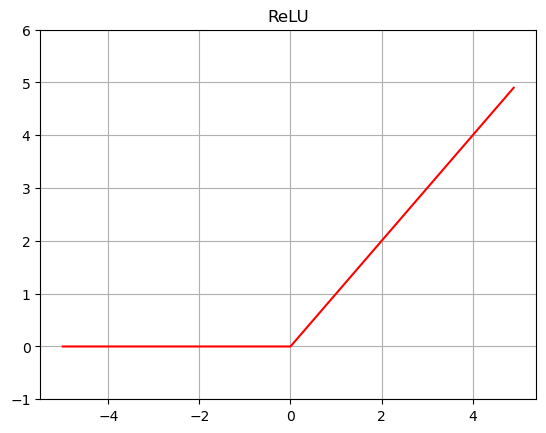

In [234]:
plt.plot(np.arange(-5, 5, 0.1), ReLU(np.arange(-5, 5, 0.1)), color= 'red')
plt.ylim(-1, 6)
plt.title('ReLU')
plt.grid()
plt.show()

$$
softmax(x) = \frac{e^x}{\sum_{i=1}^n e^x}
$$

In [235]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [236]:
test = np.random.randint(-2, 2, size= (10, 1))
print("test = ")
print(test.T)
print("softmax(test) = ")
print(softmax(test).T)
del test

test = 
[[ 0 -1  1  1  0  1 -1  0  1 -1]]
softmax(test) = 
[[0.06677009 0.02456334 0.18149992 0.18149992 0.06677009 0.18149992
  0.02456334 0.06677009 0.18149992 0.02456334]]


## Initialize Parameters

* W1: `10x784` rand matrix;
* b1: `10x1` rand matrix;
* W2: `10x10` rand matrix;
* b2: `10x1` rand matrix;

In [237]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

## One-Hot Output

One-hot output is the real output, or the best output the neural network can achieve. For example, for the first digit in train dataset, the label is 5. So the one-hot output is $[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]^T$. The neural network will try to make the output as close as possible to the one-hot output.

In [238]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [239]:
test = np.array([1, 3, 5, 7, 9])
print("test = ")
print(test)
print("one_hot(test) = ")
print(one_hot(test))
del test

test = 
[1 3 5 7 9]
one_hot(test) = 
[[0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


## Forward Propagation

For the hidden layer,

$$
Z_1 = W_1 X + b_1 \\
A_1 = \mathrm{ReLU}(Z_1)
$$

For the output layer, $A_1$ is its input.

$$
Z_2 = W_2 A_1 + b_2 \\
A_2 = \mathrm{softmax}(Z_2)
$$

In [240]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

## Backward Propagation

The backward propagation is the most important part in neural network. Without it, neural network can't find the optimal parameters quickly. Of course, grid searching is always an option. However, it's very time consuming.

This video helps me a lot to understand the math behind it. The link is [https://www.youtube.com/watch?v=5-rVLSc2XdE](https://www.youtube.com/watch?v=5-rVLSc2XdE).

The loss function is defined as:

$$
L(\hat{y}, y) = -\sum_{i=0}^{c} y_i \log(\hat{y}_i)
$$

In [241]:
def ReLU_deriv(Z):
    return Z > 0

$$
dZ_2 = A_2 - Y \\
dW_2 = \frac{1}{m} dZ_2 A_1^T \\
db_2 = \frac{1}{m} \sum_{i=1}^m dZ_2 \\
dZ_1 = W_2^T dZ_2 \odot \mathrm{ReLU}(Z_1) \\
dW_1 = \frac{1}{m} dZ_1 X^T \\
db_1 = \frac{1}{m} \sum_{i=1}^m dZ_1
$$

In [242]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

$$
W_{new} = W_{old} - \alpha dW
$$

Where $\alpha$ is learning rate that are determined by programmers.

In [243]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

## Training and Prediction

Our output is a `10x1` probabilities vector. We can set the highest probability as 1, others are all set 0s.

In [244]:
def get_predictions(A2):
    return np.argmax(A2, 0)

The accuracy evaluation function is also needed.

In [245]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

And we can define our training function.

In [246]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [247]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.2, 2000)

Iteration:  0
[9 7 0 ... 7 0 0] [5 7 9 ... 2 9 5]
0.063953197659883
Iteration:  10
[9 3 4 ... 7 5 0] [5 7 9 ... 2 9 5]
0.23571178558927947
Iteration:  20
[9 3 4 ... 7 5 0] [5 7 9 ... 2 9 5]
0.34886744337216863
Iteration:  30
[9 7 7 ... 7 5 0] [5 7 9 ... 2 9 5]
0.43642182109105454
Iteration:  40
[9 7 7 ... 7 5 0] [5 7 9 ... 2 9 5]
0.5113755687784389
Iteration:  50
[9 0 7 ... 7 5 0] [5 7 9 ... 2 9 5]
0.5750787539376969
Iteration:  60
[9 0 7 ... 7 5 0] [5 7 9 ... 2 9 5]
0.6236811840592029
Iteration:  70
[5 0 7 ... 7 5 0] [5 7 9 ... 2 9 5]
0.6580329016450822
Iteration:  80
[5 0 7 ... 8 5 0] [5 7 9 ... 2 9 5]
0.6853842692134606
Iteration:  90
[5 0 7 ... 2 5 0] [5 7 9 ... 2 9 5]
0.7058852942647132
Iteration:  100
[5 0 7 ... 2 5 5] [5 7 9 ... 2 9 5]
0.7211860593029652
Iteration:  110
[5 0 7 ... 2 8 5] [5 7 9 ... 2 9 5]
0.7346867343367168
Iteration:  120
[5 0 7 ... 2 8 5] [5 7 9 ... 2 9 5]
0.7466373318665933
Iteration:  130
[5 0 7 ... 2 9 5] [5 7 9 ... 2 9 5]
0.7570878543927196
Iteration:  140

## Evaluate our model

In [249]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

Y_pred = make_predictions(X_test, W1, b1, W2, b2)

Y_pred.T

array([2, 1, 0, ..., 4, 5, 6])

In [250]:
Y_test.T

array([2, 1, 0, ..., 4, 5, 6])

In [251]:
accuracy = get_accuracy(Y_pred, Y_test) * 100
accuracy

[2 1 0 ... 4 5 6] [2 1 0 ... 4 5 6]


90.45904590459047

Finally, our model has 90.5% accuracy on test set. Nice result!